In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [72]:
data = pd.read_csv('/content/sample_data/SamSung.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,40250.0,40700.0,40150.0,40450.0,35281.417969,12024279
1,2018-12-13,40650.0,40750.0,40000.0,40000.0,34888.921875,26254646
2,2018-12-14,40200.0,40200.0,38700.0,38950.0,33973.089844,19671783
3,2018-12-17,38650.0,39600.0,38650.0,39150.0,34147.535156,11532968
4,2018-12-18,38300.0,39200.0,38300.0,38900.0,33929.472656,11042101
...,...,...,...,...,...,...,...
1227,2023-12-06,71800.0,72100.0,71600.0,71700.0,71700.000000,8123087
1228,2023-12-07,71800.0,71900.0,71100.0,71500.0,71500.000000,8862017
1229,2023-12-08,72100.0,72800.0,71900.0,72600.0,72600.000000,10859463
1230,2023-12-11,72800.0,73000.0,72200.0,73000.0,73000.000000,9861960


In [73]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [74]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [95]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.9)
test_size = len(scaled_prices) - train_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]


In [96]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [97]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [98]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [99]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.0502
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13/100
16/16 [=================

In [100]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)


# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

1/1 [==============================] - 0s 76ms/step


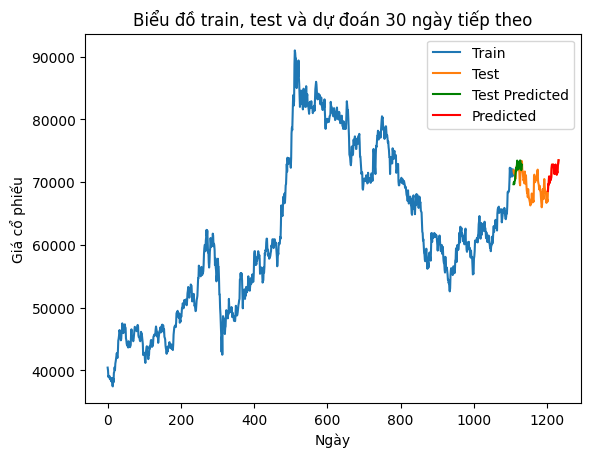

In [101]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
#plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [102]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1202    68600.0
1203    69700.0
1204    69600.0
1205    70900.0
1206    70900.0
1207    69900.0
1208    70300.0
1209    70500.0
1210    70400.0
1211    70800.0
1212    72200.0
1213    72800.0
1214    72500.0
1215    72700.0
1216    72800.0
1217    72800.0
1218    72400.0
1219    71700.0
1220    71300.0
1221    72700.0
1222    72700.0
1223    72800.0
1224    72000.0
1225    72600.0
1226    71200.0
1227    71700.0
1228    71500.0
1229    72600.0
1230    73000.0
1231    73500.0
Name: Close, dtype: float64


In [103]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)


# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test = scaler.inverse_transform(y_test)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)


1/1 [==============================] - 0s 26ms/step


In [104]:
mape_test *= 100
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


MAPE: 1.344
MAE: 967.551
RMSE: 1105.362
-------------------
